In [10]:
import os
import random
import shutil

# Directorios de entrada y salida
dataset_yolo_dir = "./dataset_yolo"
train_folder = "./yolov11/data/train"
val_folder = "./yolov11/data/val"

# Crear directorios de salida si no existen
os.makedirs(os.path.join(train_folder, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_folder, 'labels'), exist_ok=True)
os.makedirs(os.path.join(val_folder, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_folder, 'labels'), exist_ok=True)

# Obtener todas las imágenes disponibles
dataset_classes = [d for d in os.listdir(dataset_yolo_dir) if os.path.isdir(os.path.join(dataset_yolo_dir, d))]
image_files = []

for class_dir in dataset_classes:
    images_path = os.path.join(dataset_yolo_dir, class_dir)
    images = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    image_files.extend([(class_dir, img) for img in images])

# Mezclar y dividir las imágenes
random.shuffle(image_files)
train_size = int(0.8 * len(image_files))
train_files = image_files[:train_size]
val_files = image_files[train_size:]

# Función para copiar archivos
def copy_files(file_list, dest_images, dest_labels):
    for class_dir, image_file in file_list:
        # Copiar la imagen
        src_image_path = os.path.join(dataset_yolo_dir, class_dir, image_file)
        dest_image_path = os.path.join(dest_images, image_file)
        shutil.copy(src_image_path, dest_image_path)
        
        # Copiar la anotación correspondiente
        annotation_file = os.path.splitext(image_file)[0] + '.txt'
        src_annotation_path = os.path.join(dataset_yolo_dir, class_dir, annotation_file)
        if os.path.exists(src_annotation_path):
            dest_annotation_path = os.path.join(dest_labels, annotation_file)
            shutil.copy(src_annotation_path, dest_annotation_path)

# Copiar archivos de entrenamiento
copy_files(train_files, os.path.join(train_folder, 'images'), os.path.join(train_folder, 'labels'))

# Copiar archivos de validación
copy_files(val_files, os.path.join(val_folder, 'images'), os.path.join(val_folder, 'labels'))

# Crear archivo YAML para YOLOv11
yaml_content = """# Rutas a las imágenes y anotaciones
train: "{train}"
val: "{val}"

# Número de clases
nc: {num_classes}

# Nombres de las clases
names: {class_names}
""".format(train=os.path.abspath(train_folder).replace("\\", "/"), 
           val=os.path.abspath(val_folder).replace("\\", "/"),
           num_classes=len(dataset_classes),
           class_names=str(dataset_classes))

with open('./yolov11/dataset.yaml', 'w') as yaml_file:
    yaml_file.write(yaml_content)

print(f"Se dividió el conjunto de datos en {len(train_files)} para entrenamiento y {len(val_files)} para validación.")


KeyboardInterrupt: 

In [1]:
from ultralytics import YOLO

# Cargar modelo YOLOv11
model = YOLO('yolo11l.pt')

# Entrenar el modelo
model.train(
    data='yolov11/dataset.yaml',  # Ruta al archivo YAML de tus datos
    epochs=100,                # Número de épocas
    batch=16,                  # Tamaño del lote (El modelo pre entrenado es pesado y con el tamano de lote podemos ajustar la cantidad de VRAM usada en cada epoch)
    patience=10,               # Early stopping si no mejora en 10 épocas
    name='YOLOv11_plates'      # Nombre del experimento
)


Ultralytics 8.3.70  Python-3.9.21 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=yolov11/dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=YOLOv11_plates2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning C:\Users\cesar\Desktop\projects\Anpr\ocr\yolov11\data\train\labels.cache... 295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 295/295 [00:00<?, ?it/s]
val: Scanning C:\Users\cesar\Desktop\projects\Anpr\ocr\yolov11\data\val\labels.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]


Plotting labels to runs\detect\YOLOv11_plates2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000263, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\YOLOv11_plates2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.8G      2.007      4.556      2.081        109        640: 100%|██████████| 19/19 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]

                   all        223       1548       0.57      0.146     0.0769     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.9G      1.302       2.59      1.419         74        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]

                   all        223       1548      0.424      0.515      0.287      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        11G      1.224      1.591       1.36        116        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]

                   all        223       1548      0.573      0.615      0.604      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.9G      1.208      1.296      1.346         73        640: 100%|██████████| 19/19 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]

                   all        223       1548      0.681      0.606      0.681      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        11G      1.178      1.124      1.322        109        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]

                   all        223       1548      0.838      0.691      0.772      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        11G      1.145      1.007      1.302        114        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]

                   all        223       1548      0.857      0.747      0.816      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.9G      1.129      0.955      1.318        109        640: 100%|██████████| 19/19 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]

                   all        223       1548      0.803      0.777      0.819      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        11G       1.14     0.9076       1.31         91        640: 100%|██████████| 19/19 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]

                   all        223       1548      0.859      0.796      0.867      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.9G       1.14     0.8507      1.288         99        640: 100%|██████████| 19/19 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]

                   all        223       1548      0.931      0.789      0.878      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        11G      1.112     0.7997      1.293         83        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]

                   all        223       1548      0.916      0.836      0.893      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.9G      1.089     0.7684       1.28        106        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]

                   all        223       1548      0.939      0.852      0.908       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        11G      1.089     0.7831      1.272        113        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]

                   all        223       1548      0.957      0.865       0.92      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.9G      1.083     0.7391      1.258         82        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]

                   all        223       1548      0.915      0.868      0.918      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        11G      1.096     0.7207      1.265        101        640: 100%|██████████| 19/19 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]

                   all        223       1548      0.949      0.875      0.932       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.9G      1.091     0.7118      1.264        117        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]

                   all        223       1548      0.954      0.902      0.968      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        11G      1.072     0.7244      1.261         75        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        223       1548      0.956      0.872      0.939      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.9G      1.061     0.6846      1.242         90        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        223       1548      0.957      0.872       0.93      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        11G      1.042     0.6593      1.237        111        640: 100%|██████████| 19/19 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]

                   all        223       1548      0.883      0.859      0.907      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.9G      1.047     0.7052      1.267         98        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]

                   all        223       1548      0.922      0.923      0.971      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      1.023     0.6685      1.232         97        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]

                   all        223       1548      0.965      0.917      0.956      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.9G      1.017     0.6295      1.211        124        640: 100%|██████████| 19/19 [00:05<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]

                   all        223       1548      0.949      0.953      0.969      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        11G      1.003     0.6081        1.2        102        640: 100%|██████████| 19/19 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]

                   all        223       1548      0.981       0.95      0.992      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.9G     0.9896     0.6058      1.204         80        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]

                   all        223       1548      0.916      0.991      0.991      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G     0.9701     0.6106      1.178        119        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.82it/s]

                   all        223       1548      0.963      0.929      0.985      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.9G          1     0.6101      1.202         90        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.73it/s]

                   all        223       1548       0.98      0.926      0.954      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G     0.9886     0.5869      1.196         84        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.81it/s]

                   all        223       1548      0.903      0.945      0.974      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        11G     0.9841     0.5995      1.198        103        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.85it/s]

                   all        223       1548      0.954      0.942      0.969      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.9G     0.9574     0.5681      1.183        107        640: 100%|██████████| 19/19 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]

                   all        223       1548      0.963      0.922      0.949       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.9G      0.952     0.5755      1.172         88        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]

                   all        223       1548      0.933      0.965      0.993      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G      0.941     0.5452      1.172         66        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.88it/s]

                   all        223       1548      0.965      0.992      0.992      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        11G     0.9359      0.555      1.173         85        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]

                   all        223       1548      0.951      0.991      0.986      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        11G      0.951     0.5564      1.184         90        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]

                   all        223       1548      0.921      0.981       0.99      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.9G     0.9311     0.5593      1.172        122        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        223       1548      0.976      0.987      0.993      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        11G     0.9109     0.5489      1.156        118        640: 100%|██████████| 19/19 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223       1548      0.966      0.992      0.992      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.9G     0.8871     0.5181       1.14        110        640: 100%|██████████| 19/19 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]

                   all        223       1548      0.975      0.989      0.993      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        11G      0.894     0.5403       1.15         83        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]

                   all        223       1548      0.982      0.949      0.992      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.9G     0.8888     0.5268       1.12        122        640: 100%|██████████| 19/19 [00:05<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]

                   all        223       1548      0.981      0.958      0.978      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        11G     0.8916     0.5178      1.141         83        640: 100%|██████████| 19/19 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]

                   all        223       1548      0.933      0.997      0.994      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.9G      0.875      0.524      1.134        124        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]

                   all        223       1548      0.978      0.963      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        11G     0.8491     0.4988      1.122         92        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]

                   all        223       1548       0.98      0.962      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.9G     0.8403     0.4954      1.112         81        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]

                   all        223       1548      0.968      0.992      0.992      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        11G     0.8383      0.485        1.1        110        640: 100%|██████████| 19/19 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        223       1548      0.987      0.989      0.994      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        11G     0.8392      0.486      1.105        105        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]

                   all        223       1548      0.982      0.994      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        11G     0.8205     0.5048       1.11         82        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        223       1548       0.98      0.992      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.9G     0.7933     0.4649      1.074         98        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.01it/s]

                   all        223       1548      0.981      0.998      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        11G     0.8099     0.4932      1.109         63        640: 100%|██████████| 19/19 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        223       1548      0.986      0.997      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.9G     0.7806     0.4558      1.075        119        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]

                   all        223       1548      0.993      0.997      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        11G     0.7614     0.4623      1.066        107        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        223       1548      0.989      0.995      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.9G     0.7647     0.4678      1.071         93        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]

                   all        223       1548      0.987      0.996      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        11G     0.7605     0.4535      1.067        111        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]

                   all        223       1548      0.992      0.994      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.9G     0.7492     0.4519      1.057        108        640: 100%|██████████| 19/19 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        223       1548       0.98       0.99      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.9G     0.7533     0.4432      1.058         83        640: 100%|██████████| 19/19 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.81it/s]

                   all        223       1548      0.989      0.989      0.993       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.9G      0.748     0.4483      1.064        104        640: 100%|██████████| 19/19 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]

                   all        223       1548      0.971      0.998      0.994      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        11G     0.7229     0.4242      1.044        100        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.82it/s]

                   all        223       1548      0.985      0.998      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.9G     0.7358     0.4391      1.054        121        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]

                   all        223       1548      0.985      0.994      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        11G     0.7214     0.4306       1.04         82        640: 100%|██████████| 19/19 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        223       1548      0.981      0.997      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.9G     0.7208     0.4306      1.048         91        640: 100%|██████████| 19/19 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]

                   all        223       1548      0.987      0.993      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        11G     0.7116     0.4404      1.035        126        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]

                   all        223       1548      0.987      0.991      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        11G     0.6964     0.3969      1.017         94        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]

                   all        223       1548      0.988      0.996      0.994      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        11G     0.6918     0.4238      1.032        129        640: 100%|██████████| 19/19 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]

                   all        223       1548      0.982      0.999      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100        11G      0.667     0.4192      1.021        107        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]

                   all        223       1548       0.99      0.996      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        11G     0.6584     0.4041      1.014         92        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]

                   all        223       1548      0.987      0.997      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.9G     0.6559     0.4151     0.9999        106        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]

                   all        223       1548      0.989      0.996      0.994      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        11G     0.6359     0.3869     0.9909         86        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]

                   all        223       1548      0.965          1      0.994      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        11G     0.6332     0.3948      1.005        119        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]

                   all        223       1548      0.988      0.997      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        11G     0.6287     0.3942     0.9979        101        640: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        223       1548      0.989      0.998      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.9G     0.6102     0.3791     0.9892         83        640: 100%|██████████| 19/19 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        223       1548       0.99      0.997      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        11G     0.6199      0.376     0.9948         67        640: 100%|██████████| 19/19 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.72it/s]

                   all        223       1548      0.991      0.996      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.9G     0.6145     0.3957      0.985         91        640: 100%|██████████| 19/19 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]

                   all        223       1548       0.99      0.996      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        11G     0.6014     0.3708     0.9939        100        640: 100%|██████████| 19/19 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.81it/s]

                   all        223       1548      0.989      0.998      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100        11G     0.5889     0.3621      0.978        111        640: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]

                   all        223       1548      0.993      0.999      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.9G     0.5891     0.3519     0.9592        191        640:  32%|███▏      | 6/19 [00:01<00:04,  3.17it/s]


KeyboardInterrupt: 


image 1/1 c:\Users\cesar\Desktop\projects\Anpr\ocr\dataset\0\images\plate_car_0197.jpg: 320x640 2 2s, 1 5, 1 8, 1 A, 1 E, 1 F, 30.0ms
Speed: 1.0ms preprocess, 30.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
Detecciones ordenadas de izquierda a derecha:
E228AF5


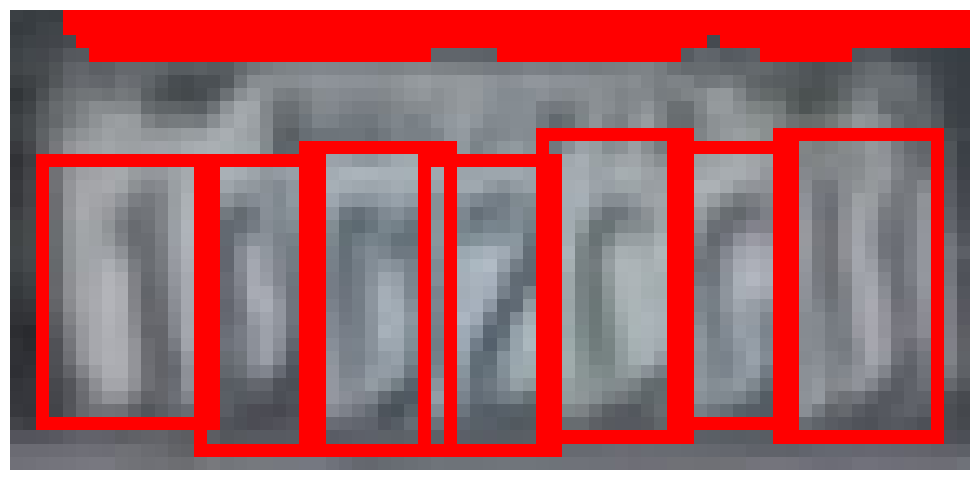

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
model = YOLO('runs/detect/YOLOv11_plates2/weights/best.pt')

# Diccionario de nombres de clases
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'X', 'Y', 'Z']

# Ruta de la imagen de prueba
image_path = 'dataset/0/images/plate_car_0197.jpg'

# Realizar la predicción
results = model(image_path)

# Dibujar las anotaciones en la imagen
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

detections = []

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordenadas del cuadro
        conf = box.conf[0].item()  # Confianza de la detección
        cls = int(box.cls[0].item())  # ID de la clase
        label = f"{class_names[cls]} {conf:.2f}"
        detections.append((x1, class_names[cls]))
        
        # Ajustar grosor del rectángulo y tamaño de fuente
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 1)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

# Ordenar detecciones de izquierda a derecha
detections.sort(key=lambda x: x[0])

# Obtener resultado final de la lectura
plate_number = "".join([d[1] for d in detections])

# Imprimir detecciones ordenadas
print("Detecciones ordenadas de izquierda a derecha:")
print(plate_number)

# Mostrar la imagen con las detecciones
plt.figure(figsize=(10, 6), dpi=100)
plt.imshow(image)
plt.axis("off")
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)
plt.show()

In [ ]:
import pytesseract

custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(dilated, config=custom_config)
print(text)


In [12]:
import cv2
import pytesseract as pt

# Ruta a Tesseract-OCR
pt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Cargar la imagen de la placa
image = cv2.imread("dataset/4/images/plate_car_1261.jpg")

# Convertir a escala de grises para reducir ruido
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbral adaptativo (binarización)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Aplicar apertura (erosión + dilatación) para reducir ruido
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
processed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Detectar contornos para segmentar caracteres
contours, _ = cv2.findContours(processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Ordenar los contornos de izquierda a derecha
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

# Configuración de Tesseract: solo letras y números
custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

# Diccionario de corrección de caracteres confusos
char_correction = {
    'O': '9', 'I': '1', 'L': '1', 'Z': '2', 'S': '5', 'B': '8',
    'G': '6', 'Q': '0', 'D': '0', 'T': '7', 'Y': '7', 'E': '3',
    'A': '4', 'J': '1', 'C': '0'
}

def correct_plate_format(plate_text):
    if len(plate_text) < 6:
        return plate_text  # Si la placa es muy corta, no se puede validar correctamente
    
    corrected = list(plate_text)
    for i in range(min(4, len(plate_text))):  # Los primeros 3 o 4 deben ser números
        if corrected[i] in char_correction:
            corrected[i] = char_correction[corrected[i]]
    
    return "".join(corrected)

plate_text = ""

# Recorrer cada contorno detectado
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Filtrar por tamaño mínimo (para evitar ruido)
    if h > 20 and w > 10:
        margin = 5  # Agregar un pequeño margen alrededor del caracter
        char = processed[max(0, y-margin):min(image.shape[0], y+h+margin),
                         max(0, x-margin):min(image.shape[1], x+w+margin)]
        char_text = pt.image_to_string(char, config=custom_config).strip()
        if char_text:
            plate_text += char_text

# Aplicar la corrección de formato
corrected_plate = correct_plate_format(plate_text)
print(f"Placa detectada corregida: {corrected_plate}")

# Mostrar la imagen procesada (opcional)
cv2.imshow("Placa Procesada", processed)
cv2.waitKey(0)
cv2.destroyAllWindows()


Placa detectada corregida: 4695UBF


Using CPU. Note: This module is much faster with a GPU.


Números detectados en la placa: 4695


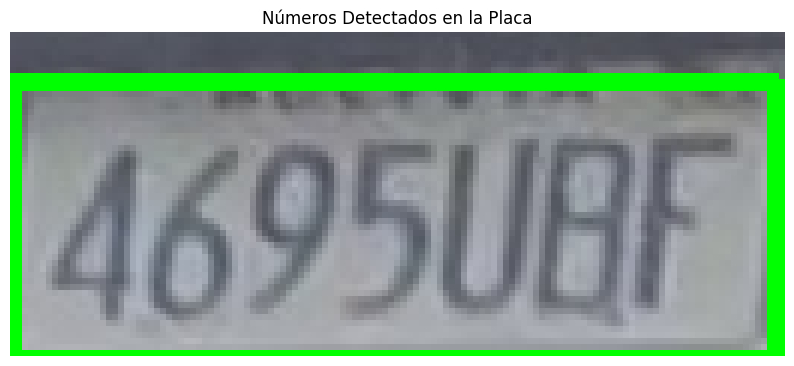

In [9]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen de la placa
image_path = "dataset/4/images/plate_car_1261.jpg"  # Reemplaza con la ruta de tu imagen
image = cv2.imread(image_path)

# Convertir a escala de grises para mejorar OCR
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inicializar el lector de EasyOCR en español e inglés
reader = easyocr.Reader(['en'], gpu=False)

# Realizar OCR en la imagen
results = reader.readtext(gray)

# Filtrar solo números (0-9)
numeros_detectados = []
for result in results:
    texto = result[1]  # Extraer el texto reconocido
    solo_numeros = ''.join([char for char in texto if char.isdigit()])  # Filtrar solo dígitos
    if solo_numeros:  
        numeros_detectados.append(solo_numeros)

# Unir los números detectados en una sola cadena
numeros_final = ''.join(numeros_detectados)

# Mostrar los resultados
print("Números detectados en la placa:", numeros_final)

# Dibujar rectángulos alrededor de los números detectados
for result in results:
    bbox, text, prob = result
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])

    # Dibujar un rectángulo alrededor del texto detectado
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.putText(image, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Convertir BGR a RGB para mostrar correctamente en Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.axis("off")  # Ocultar ejes
plt.title("Números Detectados en la Placa")
plt.show()


Using CPU. Note: This module is much faster with a GPU.


Letras detectadas en la placa: UBF


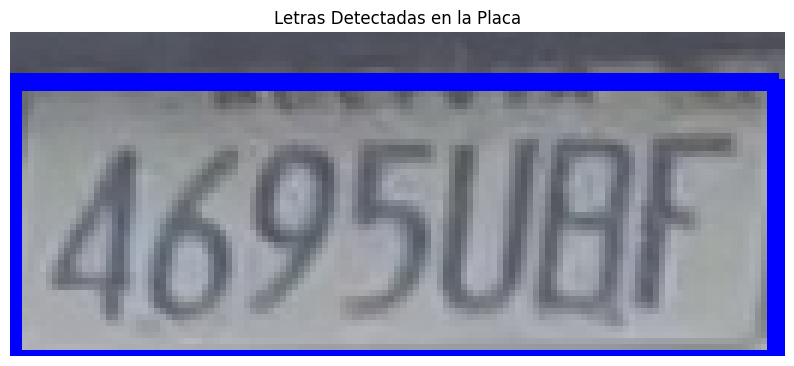

In [1]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
image_path = "dataset/4/images/plate_car_1261.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Convertir a escala de grises para mejorar OCR
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inicializar el lector de EasyOCR en inglés (mejor para letras en placas)
reader = easyocr.Reader(['en'], gpu=False)

# Realizar OCR en la imagen
results = reader.readtext(gray)

# Filtrar solo letras (A-Z)
letras_detectadas = []
for result in results:
    texto = result[1]  # Extraer el texto reconocido
    solo_letras = ''.join([char for char in texto if char.isalpha()])  # Filtrar solo letras
    if solo_letras:  
        letras_detectadas.append(solo_letras)

# Unir las letras detectadas en una sola cadena
letras_final = ''.join(letras_detectadas)

# Mostrar los resultados
print("Letras detectadas en la placa:", letras_final)

# Dibujar rectángulos alrededor de las letras detectadas
for result in results:
    bbox, text, prob = result
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])

    # Dibujar un rectángulo alrededor del texto detectado
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    cv2.putText(image, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Convertir BGR a RGB para mostrar correctamente en Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.axis("off")  # Ocultar ejes
plt.title("Letras Detectadas en la Placa")
plt.show()


Using CPU. Note: This module is much faster with a GPU.


Caracteres detectados en la placa: 4695UBF


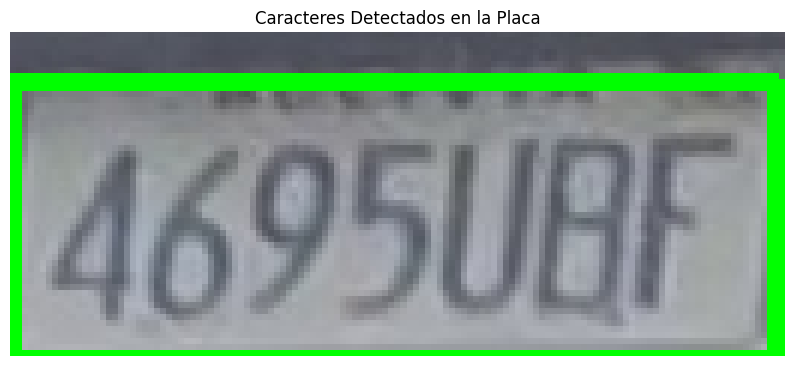

In [5]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
image_path = "dataset/4/images/plate_car_1261.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Convertir a escala de grises para mejorar OCR
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inicializar el lector de EasyOCR en inglés (mejor para placas)
reader = easyocr.Reader(['en'], gpu=False)

# Realizar OCR en la imagen
results = reader.readtext(gray)
 
# Filtrar caracteres alfanuméricos (letras y números)
caracteres_detectados = []

for result in results:
    texto = result[1]  # Extraer el texto reconocido
    solo_alfanumericos = ''.join([char for char in texto if char.isalnum()])  # Filtrar letras y números
    if solo_alfanumericos:  
        caracteres_detectados.append(solo_alfanumericos)

# Unir los caracteres detectados en una sola cadena
resultado_final = ''.join(caracteres_detectados)

# Mostrar los resultados
print("Caracteres detectados en la placa:", resultado_final)

# Dibujar rectángulos alrededor de los caracteres detectados
for result in results:
    bbox, text, prob = result
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])

    # Dibujar un rectángulo alrededor del texto detectado
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Verde para letras y números
    cv2.putText(image, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Convertir BGR a RGB para mostrar correctamente en Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.axis("off")  # Ocultar ejes
plt.title("Caracteres Detectados en la Placa")
plt.show()


Using CPU. Note: This module is much faster with a GPU.


Caracteres detectados en la placa: 4S9SWF


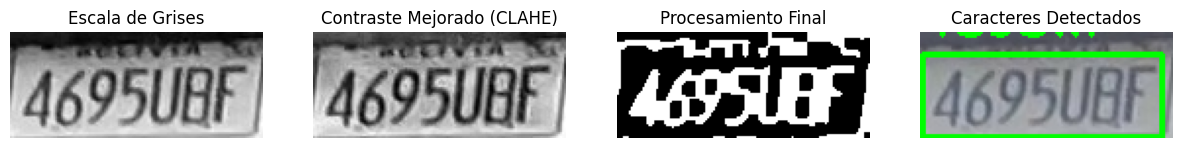

In [4]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
image_path = "dataset/4/images/plate_car_0221.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mejorar el contraste con CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

# Aplicar desenfoque Gaussiano para reducir ruido
blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)

# Aplicar umbral adaptativo para resaltar caracteres
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 10
)

# Aplicar operaciones morfológicas para eliminar ruido y mejorar los bordes de los caracteres
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Inicializar EasyOCR en inglés
reader = easyocr.Reader(['en'], gpu=False)

# Realizar OCR en la imagen procesada
results = reader.readtext(morph)

# Filtrar caracteres alfanuméricos (letras y números)
caracteres_detectados = []
for result in results:
    texto = result[1]  # Extraer el texto reconocido
    solo_alfanumericos = ''.join([char for char in texto if char.isalnum()])  # Filtrar solo letras y números
    if solo_alfanumericos:  
        caracteres_detectados.append(solo_alfanumericos)

# Unir los caracteres detectados en una sola cadena
resultado_final = ''.join(caracteres_detectados)

# Mostrar los resultados
print("Caracteres detectados en la placa:", resultado_final)

# Dibujar rectángulos alrededor de los caracteres detectados en la imagen original
for result in results:
    bbox, text, prob = result
    x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
    x_max, y_max = int(bbox[2][0]), int(bbox[2][1])

    # Dibujar un rectángulo alrededor del texto detectado
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Verde para letras y números
    cv2.putText(image, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Convertir BGR a RGB para mostrar correctamente en Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes en cada paso del procesamiento
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(gray, cmap="gray")
axes[0].set_title("Escala de Grises")
axes[0].axis("off")

axes[1].imshow(enhanced, cmap="gray")
axes[1].set_title("Contraste Mejorado (CLAHE)")
axes[1].axis("off")

axes[2].imshow(morph, cmap="gray")
axes[2].set_title("Procesamiento Final")
axes[2].axis("off")

axes[3].imshow(image_rgb)
axes[3].set_title("Caracteres Detectados")
axes[3].axis("off")

plt.show()


Using CPU. Note: This module is much faster with a GPU.


Región de letras fuera de los límites, usando imagen completa.
Texto reconocido en la placa: 46950UBF


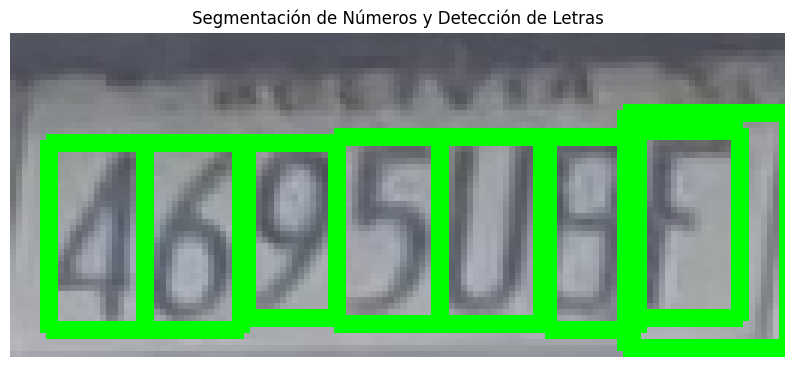

In [5]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para corregir errores comunes en OCR
def corregir_texto(texto):
    correcciones = {
        
    }
    return ''.join([correcciones[c] if c in correcciones else c for c in texto])

# Función para segmentar números en la placa
def segmentar_numeros(image):
    edges = cv2.Canny(image, 50, 150)  # Detectar bordes
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    num_regions = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 15 < h < 100 and 10 < w < 50:  # Filtrar caracteres numéricos
            num_regions.append((x, y, w, h))

    return sorted(num_regions, key=lambda x: x[0])  # Ordenar de izquierda a derecha

# Función para extraer la región de letras
def extraer_region_letras(image, num_regions):
    if not num_regions:
        print("No se detectaron números, usando imagen completa para letras.")
        return image  # Si no hay números, usar la imagen completa

    max_x = max([x + w for x, y, w, h in num_regions])

    if max_x >= image.shape[1]:
        print("Región de letras fuera de los límites, usando imagen completa.")
        return image

    region_letras = image[:, max_x:]

    if region_letras.shape[1] == 0:
        print("Imagen de letras vacía, usando imagen completa.")
        return image

    return region_letras

# Cargar la imagen
image_path = "dataset/4/images/plate_car_1261.jpg"
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Error: No se pudo cargar la imagen. Verifica la ruta.")

# Convertir a escala de grises y mejorar el contraste
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

# Aplicar umbral adaptativo
thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 10)

# Segmentar solo los números
num_regions = segmentar_numeros(thresh)

# Inicializar EasyOCR
reader = easyocr.Reader(['en'], gpu=False)

# Extraer números usando segmentación individual
numeros_detectados = []
for x, y, w, h in num_regions:
    num_img = thresh[y:y+h, x:x+w]
    num_img = cv2.resize(num_img, (50, 80))  
    ocr_result = reader.readtext(num_img, detail=0)

    if ocr_result:
        numeros_detectados.append(ocr_result[0])

# Unir y limpiar los números detectados
numeros_final = ''.join(numeros_detectados)
numeros_final = ''.join([c for c in numeros_final if c.isdigit()])  # Eliminar letras accidentales

# Extraer solo la región donde deberían estar las letras
region_letras = extraer_region_letras(gray, num_regions)

# Aplicar OCR solo a la parte de la imagen donde están las letras
if region_letras is not None and region_letras.shape[1] > 0:
    results_letras = reader.readtext(region_letras)
else:
    results_letras = []

# Filtrar solo letras y corregir errores comunes
letras_detectadas = []
for result in results_letras:
    texto = result[1]
    solo_letras = ''.join([char for char in texto if char.isalpha()])
    if solo_letras:
        letras_detectadas.append(solo_letras)

# Unir las letras detectadas y aplicar correcciones
letras_final = ''.join(letras_detectadas)
letras_final = corregir_texto(letras_final)

# Asegurar que solo haya 3 letras
if len(letras_final) > 3:
    letras_final = letras_final[-3:]

# Combinar números y letras en la placa final
placa_detectada = numeros_final + letras_final

# Mostrar el resultado final
print("Texto reconocido en la placa:", placa_detectada)

# Dibujar los resultados en la imagen
for x, y, w, h in num_regions:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Verde para números

# Mostrar la imagen con detección de caracteres
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Segmentación de Números y Detección de Letras")
plt.show()
